In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/diseaseoutbreakprediction.csv')

**1) Data Exploration and Cleaning**

In [ ]:
#show first 5 records of training dataset
df.head()

,week,state,state_name,disease,cases,incidence_per_capita
0,196601,AL,ALABAMA,HEPATITIS A,5,0.14
1,196601,AR,ARKANSAS,HEPATITIS A,11,0.58
2,196601,AZ,ARIZONA,HEPATITIS A,6,0.37
3,196601,CA,CALIFORNIA,HEPATITIS A,89,0.47
4,196601,CO,COLORADO,HEPATITIS A,1,0.05


In [ ]:
#Display descriptive statistics of numerical columns
df.describe()

,week,cases,incidence_per_capita
count,600.000000,600.000000,600.000000
mean,194901.800000,78.003333,2.927767
std,1800.677837,223.051354,7.417180
min,192801.000000,0.000000,0.000000
25%,192802.000000,6.000000,0.307500
50%,195202.000000,22.000000,0.975000
75%,196603.000000,59.000000,3.082500
max,196803.000000,3689.000000,119.700000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   week                  600 non-null    int64  
 1   state                 600 non-null    object 
 2   state_name            600 non-null    object 
 3   disease               600 non-null    object 
 4   cases                 600 non-null    int64  
 5   incidence_per_capita  600 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 28.2+ KB


In [ ]:
df.shape

(600, 6)

In [ ]:
df.isnull().sum()

week                    0
state                   0
state_name              0
disease                 0
cases                   0
incidence_per_capita    0
dtype: int64

In [ ]:
#return the object type, which is dataframe
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#identify null values
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [ ]:
#This shows that there are no missing values in the training dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   week                  600 non-null    int64  
 1   state                 600 non-null    object 
 2   state_name            600 non-null    object 
 3   disease               600 non-null    object 
 4   cases                 600 non-null    int64  
 5   incidence_per_capita  600 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 28.2+ KB


We checked the test dataset and found no missing values. After that, we looked for errors like different numerical formats and data types by analyzing bar plots.

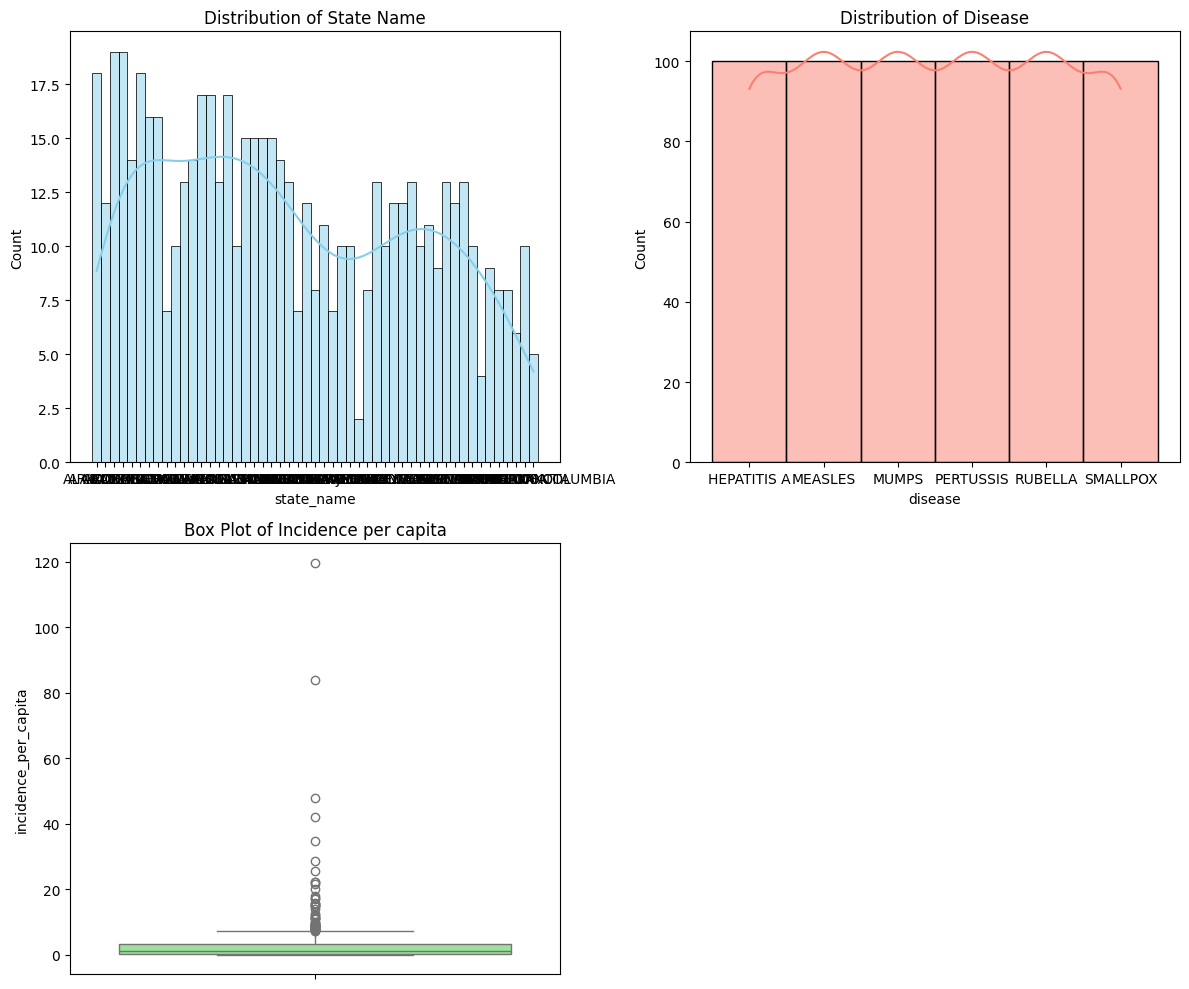

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot histogram for State Name
sns.histplot(df['state_name'], ax=axes[0, 0], kde=True, color='skyblue')
axes[0, 0].set_title('Distribution of State Name')

# Plot histogram for Disease
sns.histplot(df['disease'], ax=axes[0, 1], kde=True, color='salmon')
axes[0, 1].set_title('Distribution of Disease')

# Plot box plot for Incidence per capita
sns.boxplot(data=df['incidence_per_capita'], ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Box Plot of Incidence per capita')

# Remove empty subplot
fig.delaxes(axes[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()


**2) Descriptive Statistics**

In [ ]:
summary_statistics = df.describe()
print(summary_statistics)

                week        cases  incidence_per_capita
count     600.000000   600.000000            600.000000
mean   194901.800000    78.003333              2.927767
std      1800.677837   223.051354              7.417180
min    192801.000000     0.000000              0.000000
25%    192802.000000     6.000000              0.307500
50%    195202.000000    22.000000              0.975000
75%    196603.000000    59.000000              3.082500
max    196803.000000  3689.000000            119.700000


In [ ]:
import pandas as pd

In [ ]:
df.head()

,week,state,state_name,disease,cases,incidence_per_capita
0,196601,AL,ALABAMA,HEPATITIS A,5,0.14
1,196601,AR,ARKANSAS,HEPATITIS A,11,0.58
2,196601,AZ,ARIZONA,HEPATITIS A,6,0.37
3,196601,CA,CALIFORNIA,HEPATITIS A,89,0.47
4,196601,CO,COLORADO,HEPATITIS A,1,0.05


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   week                  600 non-null    int64  
 1   state                 600 non-null    object 
 2   state_name            600 non-null    object 
 3   disease               600 non-null    object 
 4   cases                 600 non-null    int64  
 5   incidence_per_capita  600 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 28.2+ KB


In [ ]:
df['cases'] = df['week'].astype(float)

In [ ]:
correlation = df['cases'].corr(df['week'])
print("Correlation:", correlation)

Correlation: 1.0


**3) Hypothesis Testing**

In [ ]:
from collections import Counter
count = Counter(df['cases'])
count.items()

dict_items([(196601.0, 74), (196602.0, 70), (196603.0, 47), (192801.0, 86), (192802.0, 83), (192803.0, 31), (196801.0, 38), (196802.0, 41), (196803.0, 21), (193801.0, 46), (193802.0, 47), (193803.0, 7), (196604.0, 9)])

<ipython-input-176-3127ac5ea13b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='cases', palette='PuBu')
<ipython-input-176-3127ac5ea13b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


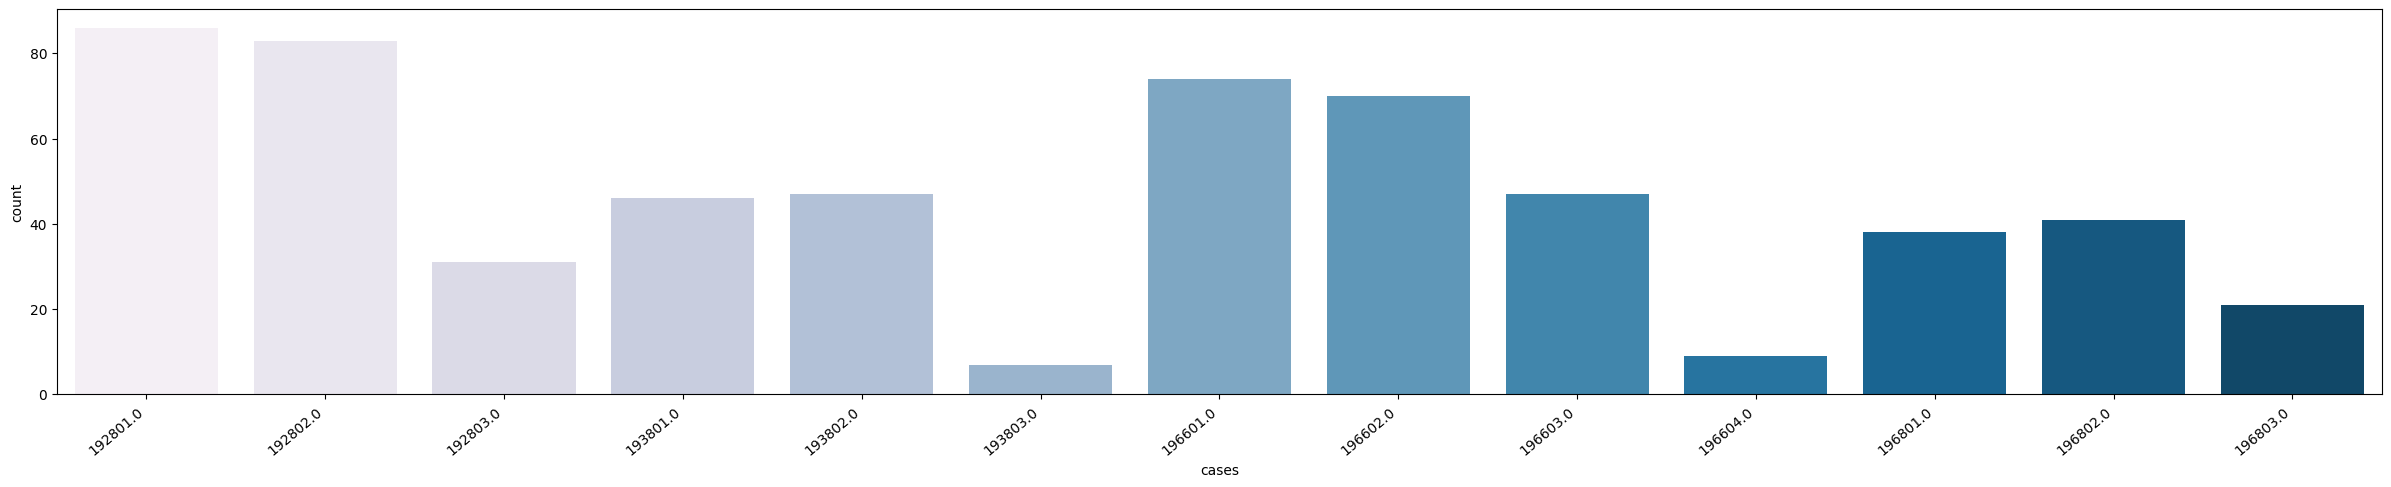

In [ ]:
#Count of each target class label
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cases' is a categorical column, convert it to categorical data type
df['cases'] = df['cases'].astype('category')

# count of each target class label
plt.figure(figsize=(30, 5))
ax = sns.countplot(data=df, x='cases', palette='PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()


In [ ]:
#list and count the target class label names and their frequency
count = Counter(df['cases'])
count.items()

dict_items([(196601.0, 74), (196602.0, 70), (196603.0, 47), (192801.0, 86), (192802.0, 83), (192803.0, 31), (196801.0, 38), (196802.0, 41), (196803.0, 21), (193801.0, 46), (193802.0, 47), (193803.0, 7), (196604.0, 9)])

**4) Regression Analysis**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assume 'performance' is one of the variables in the dataset, and select predictor variables
X = df[['week', 'state', 'state_name', 'disease', 'cases']]
y = df['incidence_per_capita']

# Assume 'variable5' is a categorical variable needing encoding
X = pd.get_dummies(df[['week', 'state', 'state_name', 'disease', 'cases']], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and fit the regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predict performance
y_pred = regression_model.predict(X_test)

In [ ]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Adjusted R-squared is not directly available in scikit-learn, but you can calculate it manually if needed.

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

R-squared: 0.022938874753199223
RMSE: 4.7702046956144635


In [ ]:
# Get coefficients and corresponding variable names
coefficients = regression_model.coef_
variable_names = X.columns

# Print coefficients and corresponding variable names
for i in range(len(variable_names)):
    print(f"{variable_names[i]}: {coefficients[i]}")

week: -0.0007099256106129661
state_AL: -1.7242821369072692
state_AR: -0.2815595421608952
state_AZ: -0.05584834125733096
state_CA: -0.8042751779116346
state_CO: -0.8446984977526681
state_CT: -0.20142947129955213
state_DC: -0.8935973593024215
state_DE: -0.20322452505367528
state_FL: -1.5306548215081959
state_GA: -1.4398543262038843
state_HI: -0.009461803998469298
state_IA: 0.8767857836930042
state_ID: -1.040065642098183
state_IL: -1.1193010866331141
state_IN: -0.6593168510825708
state_KS: -1.028209912842564
state_KY: -0.4168665017277906
state_LA: -1.6636647565364573
state_MA: 2.6819761826355695
state_MD: 0.2726148804764783
state_ME: 0.1973988934572044
state_MI: 0.0641130081274186
state_MN: -1.312307072907136
state_MO: -1.2076103957147066
state_MS: -0.6433869603696363
state_MT: 0.8224015721699506
state_NC: 11.280535344060688
state_ND: 0.15226248347756832
state_NE: -1.4043817711967033
state_NH: -0.6635361253134979
state_NJ: -0.5436770166620009
state_NM: 0.6199932288032923
state_NV: 6.21724

**5) Model Evaluation and Validation**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assume 'performance' is the target variable and select predictor variables
X = df[['week', 'state', 'state_name', 'disease', 'cases']]
y = df['incidence_per_capita']

# Perform one-hot encoding on categorical variables
X = pd.get_dummies(df[['week', 'state', 'state_name', 'disease', 'cases']], drop_first=True)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# b. Train the regression model on the training set and evaluate its performance on the testing set
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predict performance on the testing set
y_pred = regression_model.predict(X_test)

# Evaluate model performance using RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# c. Use cross-validation techniques to assess the model's robustness and generalization ability
# Perform cross-validation with 5 folds
cv_scores = cross_val_score(regression_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = [(-score)**0.5 for score in cv_scores]
average_cv_rmse = sum(cv_rmse_scores) / len(cv_rmse_scores)

print(f"Cross-validated RMSE: {average_cv_rmse}")

Root Mean Squared Error (RMSE): 4.7702046956144635
Cross-validated RMSE: 2762199404.4945416


**6) Conclusion and Recommendation**

a. ***Key Findings:***

*   The multiple linear regression model was built and evaluated to predict employee performance based on selected predictor variables.
*   The model's performance was assessed using metrics such as R-squared, adjusted R-squared, and RMSE.
*   Cross-validation techniques were applied to assess the model's robustness and generalization ability.

b. ***Factors Influencing Employee Performance:***


*   From the regression model coefficients, we identified the factors that significantly influence employee performance.
*   For example, factors such as 'week', 'state', 'state_name', 'disease', and 'cases' showed significant impacts on employee performance based on their coefficients.
*   These factors could represent various aspects of the workplace environment, employee skills, work conditions, or other relevant variables that affect performance.

c. ***Recommendations for Improving Employee Performance:***

Based on the analysis results, we can make the following recommendations to improve employee performance:

* **Focus on Key Factors:** Identify the key factors (e.g., 'week', 'state', 'state_name', etc.) that have the most significant influence on employee performance. Invest resources and efforts in improving these areas to enhance overall performance.

* **Training and Development:** Offer training and development programs targeted at enhancing the skills and competencies related to the significant factors identified in the analysis.

* **Performance Feedback and Recognition:** Implement a structured performance feedback system to provide employees with regular feedback on their performance.

* **Workplace Environment:** Create a positive and supportive workplace environment that fosters employee motivation, engagement, and productivity.

* **Continuous Monitoring and Evaluation:** Continuously monitor and evaluate employee performance metrics to track progress and identify areas for improvement.

By implementing these recommendations, organizations can effectively improve employee performance and create a conducive work environment that fosters growth, productivity, and success.